Mesmo agrupando por ano, testei aqui alternativamente manter as informações mensais criando novas colunas para cada variável e mês. 

A lógica buscada com essa alternativa é que, as chuvas, ocorridas em um determinado mês, pode ser mais correlacionada com a variável alvo do que as chuvas ocorridas em outro mês. Isso é em função de que existem determinados meses em que as plantas do cultivo podem estar em dormência, não aproveitando uma eventual chuva neste mesmo momento.  

Já que foi feito esse procedimento, de criar novas colunas para cada combinação entre chuvas e mês, fez-se logo o mesmo para todas as demais variáveis multiplas, que de alguma forma, podem se beneficiar de efeito semelhante.

In [190]:
%run '~/git/Bibliotecas.ipynb'

In [191]:
r_pa=pd.read_csv('~/git/Importacao-por-SH-e-Municipio/temp/r_pa.csv')
r_pa.head()

,Ano1,Mês,Ano2,Ano3,Ano4,Ano5,Ano6,Ano7,Ano8,Ano9,Ano10,Ano11,Ano12,KT_f,miFOB_f,KT_c,miFOB_c,mm
0,2007,1,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,7.750000,1.577625,4.940400,11.409323,440.032479
1,2007,2,2007,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,3.950000,0.827990,4.754204,11.025212,254.804542
2,2007,3,2007,2007,2006,2006,2006,2006,2006,2006,2006,2006,2006,5.079501,0.861611,5.559222,12.375859,94.904079
3,2007,4,2007,2007,2007,2006,2006,2006,2006,2006,2006,2006,2006,0.000000,0.000000,4.353038,9.398243,47.101981
4,2007,5,2007,2007,2007,2007,2006,2006,2006,2006,2006,2006,2006,3.609473,1.072150,5.182530,10.776779,44.209080


In [209]:
best=pd.read_csv('~/git/Importacao-por-SH-e-Municipio/temp/best.csv')
best

,ano_tipo,duração_treino,c_l
0,Ano1,5,"mm_ad,KT_c_ad,miFOB_c_ad"


In [192]:
r_pa=r_pa[r_pa.columns[[0,1,-5,-4,-3,-2,-1]]]

In [193]:
a1=r_pa.groupby(by='Ano1').KT_f.sum().reset_index().rename(columns={'Ano1':'Ano'})

In [194]:
a2=r_pa.drop(columns='KT_f')
a2.Ano1=a2.Ano1+1
a2.columns=['Ano','Mês','miFOB_f_ad','KT_c_ad','miFOB_c_ad','mm_ad']
a2.head()

,Ano,Mês,miFOB_f_ad,KT_c_ad,miFOB_c_ad,mm_ad
0,2008,1,1.577625,4.940400,11.409323,440.032479
1,2008,2,0.827990,4.754204,11.025212,254.804542
2,2008,3,0.861611,5.559222,12.375859,94.904079
3,2008,4,0.000000,4.353038,9.398243,47.101981
4,2008,5,1.072150,5.182530,10.776779,44.209080


In [195]:
a2.set_index('Mês').transpose()

Mês,1,2,3,4,5,6,7,8,9,10,...,3,4,5,6,7,8,9,10,11,12
Ano,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,...,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000
miFOB_f_ad,1.577625,0.827990,0.861611,0.000000,1.072150,0.112635,1.713097,1.473226,2.252750,4.877301,...,2.800274,3.192535,0.000000,1.860294,3.825764,6.701532,7.412341,3.958095,2.043387,4.267744
KT_c_ad,4.940400,4.754204,5.559222,4.353038,5.182530,3.867041,4.842130,6.834140,5.559960,4.316160,...,9.595460,9.628138,10.600462,9.799272,8.177708,9.773616,9.116336,13.468415,13.333333,15.984130
miFOB_c_ad,11.409323,11.025212,12.375859,9.398243,10.776779,8.210743,10.396984,14.808028,12.334542,10.685495,...,39.014066,39.587583,44.235944,41.216405,33.071779,36.074416,31.254986,44.305561,43.663488,53.573926
mm_ad,440.032479,254.804542,94.904079,47.101981,44.209080,5.998364,75.534710,0.658791,12.826410,111.058571,...,165.333333,125.466667,44.233333,22.166667,12.333333,18.100000,33.833333,242.833333,128.533333,139.866667


In [196]:
q1=pd.DataFrame()

for y in a2.Ano.unique().tolist():
    q2=pd.DataFrame()
    a2t=a2[a2.Ano==y].drop(columns='Ano')
    for c in a2t.columns[1:].tolist():
        a2t1=a2t[['Mês',c]]
        a2t1['Multi']=a2t1.Mês.astype(str)+'-'+c
        a2t1=a2t1.drop(columns=['Mês'])
        a2t2=a2t1.set_index('Multi').transpose()
        a2t2=a2t2.reset_index(drop=True)
        #a2t2=a2t2.drop(columns='Multi')
        q2=pd.concat([q2,a2t2],axis=1)
        
    q2.insert(0,'Ano',y)
    q1=pd.concat([q1,q2])
q1

Multi,Ano,1-miFOB_f_ad,2-miFOB_f_ad,3-miFOB_f_ad,4-miFOB_f_ad,5-miFOB_f_ad,6-miFOB_f_ad,7-miFOB_f_ad,8-miFOB_f_ad,9-miFOB_f_ad,...,3-mm_ad,4-mm_ad,5-mm_ad,6-mm_ad,7-mm_ad,8-mm_ad,9-mm_ad,10-mm_ad,11-mm_ad,12-mm_ad
0,2008,1.577625,0.827990,0.861611,0.000000,1.072150,0.112635,1.713097,1.473226,2.252750,...,94.904079,47.101981,44.209080,5.998364,75.534710,0.658791,12.826410,111.058571,178.132942,236.435149
0,2009,1.007385,0.717047,0.000000,0.000000,1.865663,0.000000,13.213543,13.484617,1.823558,...,231.318883,187.533333,38.228664,21.907408,0.600000,52.333333,56.600000,122.600000,142.666667,240.666667
0,2010,0.000000,1.318733,0.686039,0.000000,0.091775,1.273218,0.000000,0.646205,2.147648,...,144.866667,58.466667,55.600000,47.066667,38.875172,58.133333,134.066667,179.071617,175.051834,329.102413
0,2011,0.715554,2.383826,0.991360,0.000000,0.000000,0.575449,1.403679,1.498225,3.611371,...,152.136052,46.200000,15.569591,16.800000,17.800000,0.541732,50.533333,63.866667,153.866667,211.200000
0,2012,5.379016,3.453923,0.080211,0.376633,1.008222,2.252472,5.563846,4.252618,4.331647,...,170.678855,81.542130,14.126903,25.890535,0.266667,11.849160,20.281540,111.447700,129.149187,185.888331
0,2013,2.750233,0.000000,0.000000,0.486969,0.523135,0.580414,0.000000,1.874448,5.198285,...,119.237783,85.500660,33.074907,81.823868,29.801376,2.275588,48.866667,51.666667,178.570706,219.179163
0,2014,1.629900,2.992975,0.000000,0.214815,0.000000,1.979027,1.431109,3.428713,2.095068,...,217.431585,145.200000,82.078365,28.138272,42.283677,3.133333,86.000000,111.133333,177.933333,163.800000
0,2015,0.926404,1.022144,0.845889,1.354967,2.142632,0.760496,1.086817,2.193207,1.768589,...,126.400000,62.333333,25.466667,6.666667,47.266667,8.558529,60.893076,45.266667,222.666667,244.428310
0,2016,1.554968,0.194250,2.013573,0.000000,1.277528,0.593615,1.000867,0.222002,2.996077,...,229.933333,60.466667,71.200000,5.333333,9.200000,3.800000,117.226410,102.333333,200.068651,252.435746
0,2017,0.502326,2.445864,1.924156,0.566444,0.377761,0.575695,1.315791,1.361129,2.741609,...,180.423048,18.501066,42.763160,77.278616,2.816020,35.961144,15.000000,153.917095,185.866667,166.666667


In [197]:
a1

,Ano,KT_f
0,2007,87.156081
1,2008,67.514794
2,2009,37.929771
3,2010,106.642892
4,2011,108.483294
5,2012,72.686093
6,2013,72.885800
7,2014,71.228923
8,2015,75.850326
9,2016,109.674322


In [198]:
r_pa_ad=q1.merge(a1,how='outer')
r_pa_ad

,Ano,1-miFOB_f_ad,2-miFOB_f_ad,3-miFOB_f_ad,4-miFOB_f_ad,5-miFOB_f_ad,6-miFOB_f_ad,7-miFOB_f_ad,8-miFOB_f_ad,9-miFOB_f_ad,...,4-mm_ad,5-mm_ad,6-mm_ad,7-mm_ad,8-mm_ad,9-mm_ad,10-mm_ad,11-mm_ad,12-mm_ad,KT_f
0,2008,1.577625,0.827990,0.861611,0.000000,1.072150,0.112635,1.713097,1.473226,2.252750,...,47.101981,44.209080,5.998364,75.534710,0.658791,12.826410,111.058571,178.132942,236.435149,67.514794
1,2009,1.007385,0.717047,0.000000,0.000000,1.865663,0.000000,13.213543,13.484617,1.823558,...,187.533333,38.228664,21.907408,0.600000,52.333333,56.600000,122.600000,142.666667,240.666667,37.929771
2,2010,0.000000,1.318733,0.686039,0.000000,0.091775,1.273218,0.000000,0.646205,2.147648,...,58.466667,55.600000,47.066667,38.875172,58.133333,134.066667,179.071617,175.051834,329.102413,106.642892
3,2011,0.715554,2.383826,0.991360,0.000000,0.000000,0.575449,1.403679,1.498225,3.611371,...,46.200000,15.569591,16.800000,17.800000,0.541732,50.533333,63.866667,153.866667,211.200000,108.483294
4,2012,5.379016,3.453923,0.080211,0.376633,1.008222,2.252472,5.563846,4.252618,4.331647,...,81.542130,14.126903,25.890535,0.266667,11.849160,20.281540,111.447700,129.149187,185.888331,72.686093
5,2013,2.750233,0.000000,0.000000,0.486969,0.523135,0.580414,0.000000,1.874448,5.198285,...,85.500660,33.074907,81.823868,29.801376,2.275588,48.866667,51.666667,178.570706,219.179163,72.885800
6,2014,1.629900,2.992975,0.000000,0.214815,0.000000,1.979027,1.431109,3.428713,2.095068,...,145.200000,82.078365,28.138272,42.283677,3.133333,86.000000,111.133333,177.933333,163.800000,71.228923
7,2015,0.926404,1.022144,0.845889,1.354967,2.142632,0.760496,1.086817,2.193207,1.768589,...,62.333333,25.466667,6.666667,47.266667,8.558529,60.893076,45.266667,222.666667,244.428310,75.850326
8,2016,1.554968,0.194250,2.013573,0.000000,1.277528,0.593615,1.000867,0.222002,2.996077,...,60.466667,71.200000,5.333333,9.200000,3.800000,117.226410,102.333333,200.068651,252.435746,109.674322
9,2017,0.502326,2.445864,1.924156,0.566444,0.377761,0.575695,1.315791,1.361129,2.741609,...,18.501066,42.763160,77.278616,2.816020,35.961144,15.000000,153.917095,185.866667,166.666667,117.409059


In [199]:
r_pa_ad=r_pa_ad[r_pa_ad.Ano>2007]
r_pa_ad

,Ano,1-miFOB_f_ad,2-miFOB_f_ad,3-miFOB_f_ad,4-miFOB_f_ad,5-miFOB_f_ad,6-miFOB_f_ad,7-miFOB_f_ad,8-miFOB_f_ad,9-miFOB_f_ad,...,4-mm_ad,5-mm_ad,6-mm_ad,7-mm_ad,8-mm_ad,9-mm_ad,10-mm_ad,11-mm_ad,12-mm_ad,KT_f
0,2008,1.577625,0.827990,0.861611,0.000000,1.072150,0.112635,1.713097,1.473226,2.252750,...,47.101981,44.209080,5.998364,75.534710,0.658791,12.826410,111.058571,178.132942,236.435149,67.514794
1,2009,1.007385,0.717047,0.000000,0.000000,1.865663,0.000000,13.213543,13.484617,1.823558,...,187.533333,38.228664,21.907408,0.600000,52.333333,56.600000,122.600000,142.666667,240.666667,37.929771
2,2010,0.000000,1.318733,0.686039,0.000000,0.091775,1.273218,0.000000,0.646205,2.147648,...,58.466667,55.600000,47.066667,38.875172,58.133333,134.066667,179.071617,175.051834,329.102413,106.642892
3,2011,0.715554,2.383826,0.991360,0.000000,0.000000,0.575449,1.403679,1.498225,3.611371,...,46.200000,15.569591,16.800000,17.800000,0.541732,50.533333,63.866667,153.866667,211.200000,108.483294
4,2012,5.379016,3.453923,0.080211,0.376633,1.008222,2.252472,5.563846,4.252618,4.331647,...,81.542130,14.126903,25.890535,0.266667,11.849160,20.281540,111.447700,129.149187,185.888331,72.686093
5,2013,2.750233,0.000000,0.000000,0.486969,0.523135,0.580414,0.000000,1.874448,5.198285,...,85.500660,33.074907,81.823868,29.801376,2.275588,48.866667,51.666667,178.570706,219.179163,72.885800
6,2014,1.629900,2.992975,0.000000,0.214815,0.000000,1.979027,1.431109,3.428713,2.095068,...,145.200000,82.078365,28.138272,42.283677,3.133333,86.000000,111.133333,177.933333,163.800000,71.228923
7,2015,0.926404,1.022144,0.845889,1.354967,2.142632,0.760496,1.086817,2.193207,1.768589,...,62.333333,25.466667,6.666667,47.266667,8.558529,60.893076,45.266667,222.666667,244.428310,75.850326
8,2016,1.554968,0.194250,2.013573,0.000000,1.277528,0.593615,1.000867,0.222002,2.996077,...,60.466667,71.200000,5.333333,9.200000,3.800000,117.226410,102.333333,200.068651,252.435746,109.674322
9,2017,0.502326,2.445864,1.924156,0.566444,0.377761,0.575695,1.315791,1.361129,2.741609,...,18.501066,42.763160,77.278616,2.816020,35.961144,15.000000,153.917095,185.866667,166.666667,117.409059


In [200]:
q=pd.DataFrame()

for y in r_pa_ad.Ano.unique().tolist():

    r_pa_ad_t1=r_pa_ad[r_pa_ad.Ano<=y]

    if len(r_pa_ad_t1)>=5:
        r_pa_ad_t1=r_pa_ad_t1.sort_values('Ano')
        r_pa_ad_t1=r_pa_ad_t1.tail(5)

        train=r_pa_ad_t1[r_pa_ad_t1.Ano!=r_pa_ad_t1.Ano.max()]
        pred =r_pa_ad[r_pa_ad.Ano==r_pa_ad_t1.Ano.max()]
        X_train=train.drop(columns='KT_f')
        y_train=train.KT_f
        X_pred=pred.drop(columns='KT_f')
        RFR.fit(X_train,y_train)
        pred=X_pred.assign(KT_f=RFR.predict(X_pred))
        q=pd.concat([q,pred[['Ano','KT_f']]])
q=q.assign(tipo='prev_rfr').sort_values('Ano')
q

,Ano,KT_f,tipo
4,2012,77.563922,prev_rfr
5,2013,84.676419,prev_rfr
6,2014,87.138379,prev_rfr
7,2015,84.439369,prev_rfr
8,2016,73.755600,prev_rfr
9,2017,90.947955,prev_rfr
10,2018,96.356369,prev_rfr
11,2019,100.341350,prev_rfr
12,2020,108.595817,prev_rfr
13,2021,108.642630,prev_rfr


In [201]:
q1=r_pa_ad.dropna()[['Ano','KT_f']].assign(tipo='real').sort_values('Ano')
q1

,Ano,KT_f,tipo
0,2008,67.514794,real
1,2009,37.929771,real
2,2010,106.642892,real
3,2011,108.483294,real
4,2012,72.686093,real
5,2013,72.885800,real
6,2014,71.228923,real
7,2015,75.850326,real
8,2016,109.674322,real
9,2017,117.409059,real


In [202]:
q3=pd.concat([q1,q])
q3

,Ano,KT_f,tipo
0,2008,67.514794,real
1,2009,37.929771,real
2,2010,106.642892,real
3,2011,108.483294,real
4,2012,72.686093,real
5,2013,72.885800,real
6,2014,71.228923,real
7,2015,75.850326,real
8,2016,109.674322,real
9,2017,117.409059,real


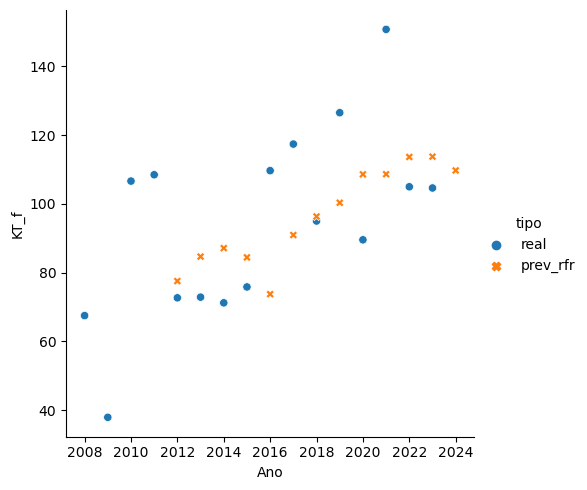

In [203]:
sns.relplot(data=q3,x='Ano',y='KT_f',hue='tipo',style='tipo')

In [204]:
q3[q3.Ano==q3.Ano.max()]

,Ano,KT_f,tipo
16,2024,109.742301,prev_rfr


In [205]:
q4=q3[q3.tipo=='real'].rename(columns={'KT_f':'KT_f_real'}).drop(columns='tipo')

In [206]:
q5=q3[q3.tipo=='prev_rfr'].rename(columns={'KT_f':'KT_f_prev_rfr'}).drop(columns='tipo')

In [207]:
q6

,Ano,KT_f_real,KT_f_prev_rfr,erro%
0,2012,72.686093,77.563922,7.0
1,2013,72.885800,84.676419,16.0
2,2014,71.228923,87.138379,22.0
3,2015,75.850326,84.439369,11.0
4,2016,109.674322,73.755600,-33.0
5,2017,117.409059,90.947955,-23.0
6,2018,95.029391,96.356369,1.0
7,2019,126.527277,100.341350,-21.0
8,2020,89.557108,108.595817,21.0
9,2021,150.758876,108.642630,-28.0


In [211]:
q6=q4.merge(q5)

q6['erro%']=round(((q6.KT_f_prev_rfr-q6.KT_f_real)/q6.KT_f_real)*100)
print(q6['erro%'].mean(), q6['erro%'].std())

-0.8333333333333334 19.844089265770773
